In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical # 원-핫 인코딩을 사용하기 위해 import 한다.
from tensorflow.keras.models import Sequential # 시퀀스를 사용하는 신경망을 생성하기 위해 import 한다.
from tensorflow.keras.layers import Dense # 신경망에 추가할 완전 연결 레이어를 생성하기 위해 import 한다.
from tensorflow.keras.layers import BatchNormalization # 배치 정규화 레이어를 생성하기 위해 import 한다.
from tensorflow.keras.layers import Activation # 활성화 함수 레이어를 생성하기 위해 import 한다.

분류 신경망을 이용해 와인 종류를 분류하는 모델을 만들어 본다.

In [2]:
# 일관된 결과값이 나오도록 numpy와 tensorflow의 seed를 설정한다.
np.random.seed(0)
tf.random.set_seed(0)

분류 신경망에 사용할 데이터 준비

In [3]:
# 데이터 불러오기
raw_data = datasets.load_wine() # 사이킷런이 제공하는 와인 데이터를 불러온다.

# 피쳐, 레이블 데이터 저장
xData = raw_data.data # 피쳐 데이터를 저장한다.
yData = raw_data.target # 피쳐 데이터에 따른 레이블을 저장한다.
print(xData.shape, yData.shape)
# 총 13개의 피쳐가 있고, 이는 신경망을 생성할 때 사용된다.

# 레이블 종류 확인
# 레이블의 종류를 확인함으로써 분류 문제인지 아니면 회귀 문제인지 파악할 수 있고, 
# 분류 문제라면 몇 가지 클래스로 구분되는 지 알 수 있다.
print(set(yData))

# 레이블 데이터 원-핫 인코딩
# to_categorical() 메소드는 원-핫 인코딩을 실행한다.
yData_onehot = to_categorical(yData)
print(yData_onehot)

# 학습 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(xData, yData_onehot, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(178, 13) (178,)
{0, 1, 2}
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 

시퀀스를 사용하는 분류 신경망 생성

In [4]:
# 분류 신경망 모델 학습에 사용되는 피쳐 개수(n)와 클래스 개수(c)를 저장한다.
n = x_train.shape[1]
c = len(set(yData))
print(f'입력 데이터 1건(피쳐)의 차원: {n}, 클래스 개수: {c}')
epochs = 50

입력 데이터 1건(피쳐)의 차원: 13, 클래스 개수: 3


In [5]:
# Sequential 객체 선언 후 Sequential 모델에 add() 메소드로 레이어를 추가해서 신경망을 만든다.
model = Sequential() # 시퀀스를 사용하는 신경망 모델을 만든다.

# 입력 레이어를 만든다.
# input_dim 속성으로 입력 데이터 1건(피쳐)의 차원, units 속성으로 레이어의 출력 차원을 지정한다.
# model.add(Dense(input_dim=n, units=20)) # 신경망 모델에 입력 레이어를 추가한다.
# model.add(Activation('relu')) # 신경망 모델에 ReLu 활성화 함수 레이어를 추가한다.
# Activation 레이어를 사용하지 않고 Dense 레이어의 activation 속성을 이용해서 활성화 함수를 지정할 수 있다.
model.add(Dense(input_dim=n, units=20, activation='relu'))
model.add(BatchNormalization()) # 신경망 모델에 배치 정규화 레이어를 추가한다.

# 출력 레이어를 만든다.
# 분류 신경망은 구분해야 할 클래스 개수만큼 units 속성을 지정한다.
# model.add(Dense(units=c)) # 신경망 모델에 출력 레이어를 추가한다.
# model.add(Activation('softmax')) # 신경망 모델에 softmax 활성화 함수 레이어를 추가한다.
model.add(Dense(units=c, activation='softmax'))

# Dense layer의 Param은 [(입력 개수 + 바이어스) * 출력 개수]로 계산되고 바이어스는 layer당 1개 이다.
# BatchNormalization의 Param은 [입력 개수 * 4]로 계산된다.
model.summary() # 신경망 모델의 구조를 확인한다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________________


분류 신경망 모델 컴파일

In [6]:
# compile() 메소드로 생성한 신경망 모델을 컴파일 한다.
# 분류 신경망은 loss 속성에 손실(비용, 오차) 함수를 지정할 때 이진 분류일 경우 'binary_crossentropy'를
# 지정하고, 3개 이상의 클래스로 분류할 경우 'categorical_crossentropy'를 지정한다.
# optimizer 속성에 최적화 함수(일반적으로 adam)를 지정한다.
# metrics 속성에 평가 기준을 지정한다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

분류 신경망 모델 학습

epoch: 전체 학습 데이터 셋 전체가 신경망을 통과하는 횟수  
iteration: 1 epoch를 마치는데 필요한 미니 배치의 개수  
batch_size: 하나의 미니 배치에 속하는 데이터의 개수

In [7]:
# fit() 메소드의 인수로 학습 데이터와 원-핫 인코딩된 학습 데이터에 따른 레이블 및 epochs 속성에 학습 횟수,
# batch_size 속성에 미니 배치 크기를 넘겨서 컴파일된 신경망 모델을 학습시킨다.
history = model.fit(x_train, y_train, epochs=epochs, batch_size=5)

Epoch 1/50
27/27 [==============================] - 1s 1ms/step - loss: 1.0109 - accuracy: 0.4436
Epoch 2/50
27/27 [==============================] - 0s 996us/step - loss: 0.8939 - accuracy: 0.5789
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 0.8722 - accuracy: 0.6241
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.7838 - accuracy: 0.6767
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.7527 - accuracy: 0.6692
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.7870 - accuracy: 0.6466
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.8206 - accuracy: 0.6541
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.7623 - accuracy: 0.6767
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.7820 - accuracy: 0.6466
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.7692 - accuracy: 0.6391
Epoch 11/50
27/27

In [8]:
# 모델 epoch 단계별로 정확도와 오차 확인
print(history.history['loss'][-1]) # 모델 실행 결과에서 오차만 얻어온다.
print(history.history['accuracy'][-1]) # 모델 실행 결과에서 정확도만 얻어온다.

0.3293907940387726
0.8646616339683533


In [9]:
# evaluate() 메소드로 테스트 데이터와 원-핫 인코딩된 테스트 데이터에 따른 레이블을 넘겨서
# 학습된 신경망을 평가한다.
print(model.evaluate(x_test, y_test))

2/2 [==============================] - 0s 4ms/step - loss: 0.8128 - accuracy: 0.6889
[0.8128146529197693, 0.6888889074325562]


정확도 및 손실 정도 시각화

In [10]:
epoch = np.arange(1, epochs + 1)
accuracy = history.history['accuracy']
loss = history.history['loss']

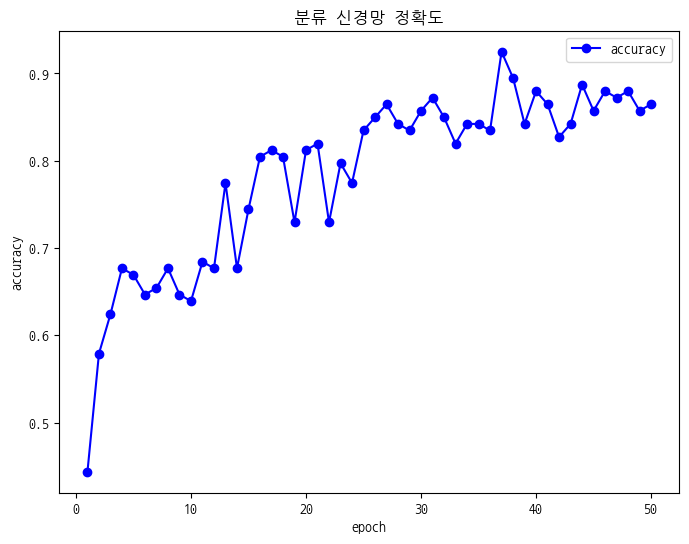

In [11]:
# 학습 정확도 시각화
plt.figure(figsize=(8, 6))
plt.plot(epoch, accuracy, 'bo-', label='accuracy')
plt.title('분류 신경망 정확도')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
# 정확도 시각화 결과 에포크 진행 단계별로 전반적인 정확도가 상승하는 것을 볼 수 있다.

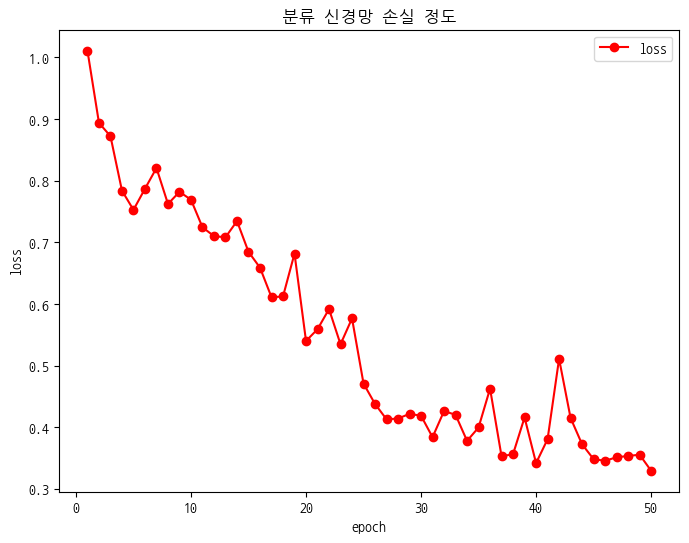

In [12]:
# 손실 정도 시각화
plt.figure(figsize=(8, 6))
plt.plot(epoch, loss, 'ro-', label='loss')
plt.title('분류 신경망 손실 정도')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
# 손실 정도 시각화 결과 에포크 진행 단계별로 전반적인 손실이 하락하는 것을 볼 수 있다.

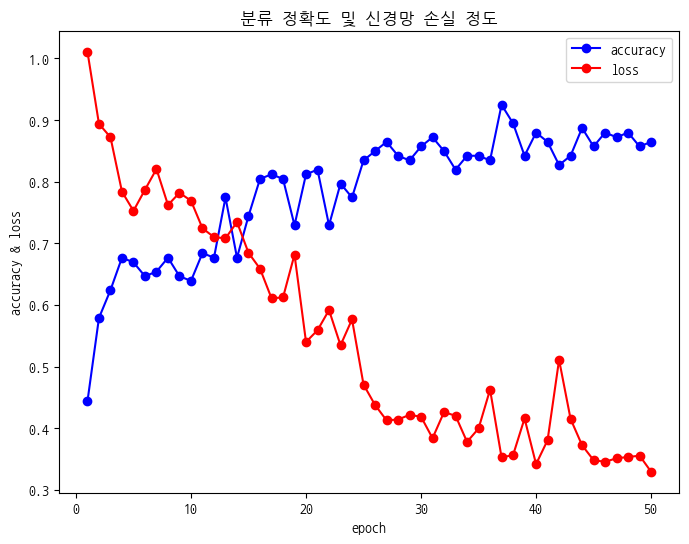

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(epoch, accuracy, 'bo-', label='accuracy')
plt.plot(epoch, loss, 'ro-', label='loss')
plt.title('분류 정확도 및 신경망 손실 정도')
plt.xlabel('epoch')
plt.ylabel('accuracy & loss')
plt.legend()
plt.show()